In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data = 'dataxps'
files = {
    'L3 Non-Temporal': f'../{data}/l3nt.csv',
    'L3 Autovec': f'../{data}/l3.csv',
    'L3 AVX': f'../{data}/l3avx.csv',
    'Non-Temporal': f'../{data}/nontemporal.csv',
    'Autovec': f'../{data}/plain.csv',
    'AVX': f'../{data}/avx2.csv'
}

files

{'L3 Non-Temporal': '../dataxps/l3nt.csv',
 'L3 Autovec': '../dataxps/l3.csv',
 'L3 AVX': '../dataxps/l3avx.csv',
 'Non-Temporal': '../dataxps/nontemporal.csv',
 'Autovec': '../dataxps/plain.csv',
 'AVX': '../dataxps/avx2.csv'}

In [19]:
# Read the data
data = {name: pd.read_csv(filepath) for name, filepath in files.items()}

for name in data: 
    data[name].columns = data[name].columns.str.replace(' ', '', regex=False)

In [20]:
average_runtimes = []
average_runtimes_read = []

for name, dataframe in data.items():
    # Calculate runtime
    repeat_3_df = dataframe[dataframe['repeat'] == 3]
    # repeat_3_df = dataframe

    repeat_3_df['runtime'] = repeat_3_df['duration'] * repeat_3_df['factor']
        
    repeat_3_df['runtimeRead'] = repeat_3_df['durationRead'] * repeat_3_df['factor']
    # Calculate and store the repeat_3_df runtime
    avg_runtime = repeat_3_df['runtime'].mean()
    avg_runtime_read = repeat_3_df['runtimeRead'].mean()
    average_runtimes.append((name, avg_runtime))
    average_runtimes_read.append((name, avg_runtime_read))


/tmp/ipykernel_7438/578977616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_3_df['runtime'] = repeat_3_df['duration'] * repeat_3_df['factor']
/tmp/ipykernel_7438/578977616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_3_df['runtimeRead'] = repeat_3_df['durationRead'] * repeat_3_df['factor']
/tmp/ipykernel_7438/578977616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

[('L3 Non-Temporal', 0.09728), ('L3 Autovec', 0.0667648), ('L3 AVX', 0.0894976), ('Non-Temporal', 0.0943818), ('Autovec', 0.17070699999999997), ('AVX', 0.21458879999999997)]
[('L3 Non-Temporal', 0.147456), ('L3 Autovec', 0.05447679999999999), ('L3 AVX', 0.0827392), ('Non-Temporal', 0.1347412), ('Autovec', 0.11765260000000002), ('AVX', 0.13468180000000002)]


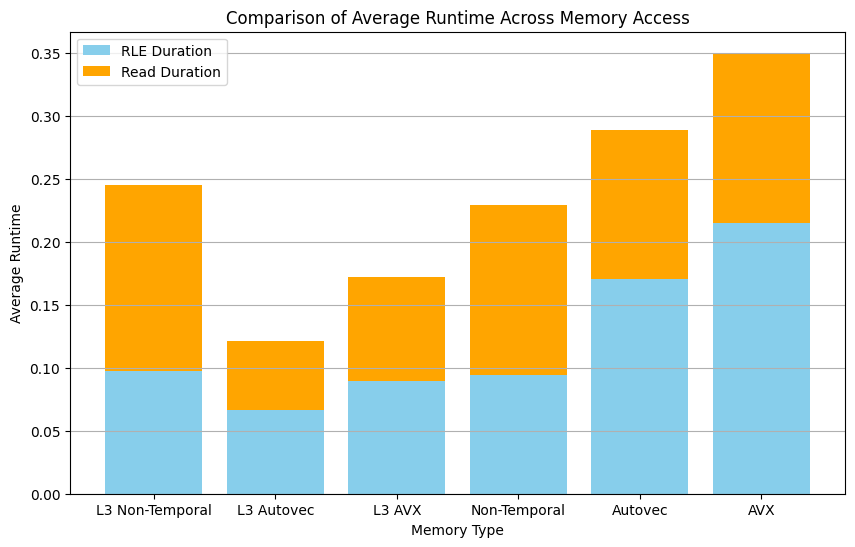

In [21]:
# Convert to DataFrame for easier plotting
avg_runtime_df = pd.DataFrame(average_runtimes, columns=['Memory Type', 'Average Runtime'])
avg_runtime_read_df = pd.DataFrame(average_runtimes_read, columns=['Memory Type', 'Average Runtime Read'])

print(average_runtimes)
print(average_runtimes_read)

# Plotting
bottom = np.zeros(len(files))

plt.figure(figsize=(10, 6))
#plt.bar(avg_runtime_read_df['Memory Type'], avg_runtime_read_df['Average Runtime Read'], label="Read Duration", color='orange', bottom=bottom)
#bottom += avg_runtime_read_df['Average Runtime Read']
plt.bar(avg_runtime_df['Memory Type'], avg_runtime_df['Average Runtime'], label="RLE Duration", color='skyblue', bottom=bottom)
bottom += avg_runtime_df['Average Runtime']
plt.bar(avg_runtime_read_df['Memory Type'], avg_runtime_read_df['Average Runtime Read'], label="Read Duration", color='orange', bottom=bottom)

plt.xlabel('Memory Type')
plt.ylabel('Average Runtime')
plt.title('Comparison of Average Runtime Across Memory Access')
plt.grid(axis='y')
plt.ylim(bottom=0)  # Ensure the y-axis starts at 0
plt.legend(loc="upper left")

plt.show()